<a href="https://colab.research.google.com/github/raulsomazabracho/Clusterization/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset with characteristics of fungi
The idea is to make a machine learning model that classifies fungi into
-Poisonous
-Not poisonous

# Import the first libraries

In [2]:
#To Gain Acces To google drive
from google.colab import drive
drive.mount('/content/drive/')
#Data science basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive/


# Dataset Reading

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Data Science/Python/Clusterizaciones (Supervisadas)/Hongos (Comparando varios modelos)/mushrooms.csv')
print(df.info)
df.head(5)

<bound method DataFrame.info of      class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]>


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
#Observing nulls per attribute
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#Observing different categories on the target variable
df['class'].unique()

array(['p', 'e'], dtype=object)

We then have 2 classifications = edible---> edible, poisonous---> toxic

# DATASET TRANSFORMATION

## Convert single strings to integers

In [ ]:
#Importamos la libreria
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Tranformamos las columnas
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
#Checking labels in one of the features
print(df['stalk-root'].unique())

[3 2 1 4 0]


In [ ]:
#Class distribution
print(df.groupby('class').size())

class
0    4208
1    3916
dtype: int64


There are 4,208 edible and 3,916 toxic records.

## Data distribution towrds the target

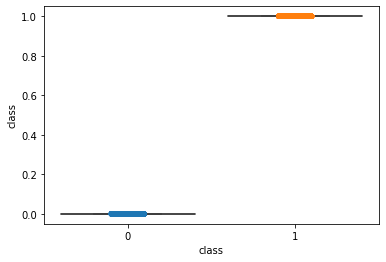

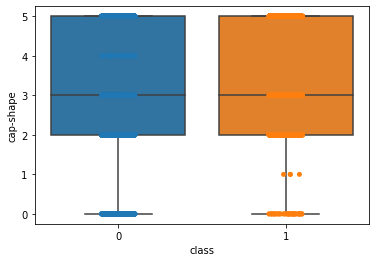

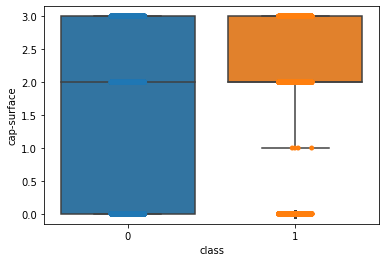

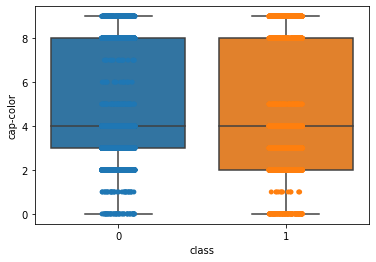

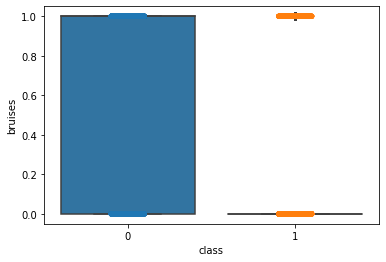

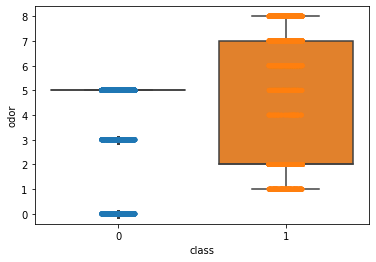

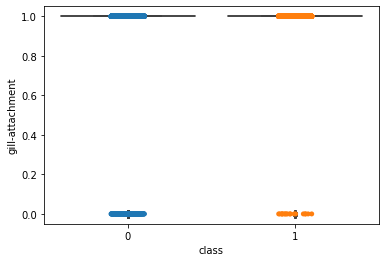

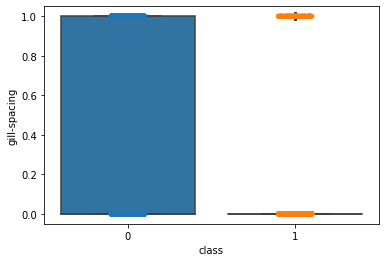

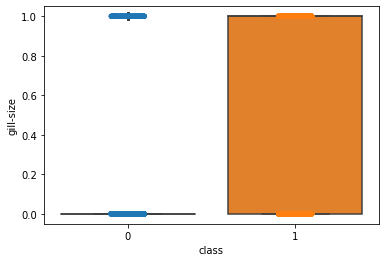

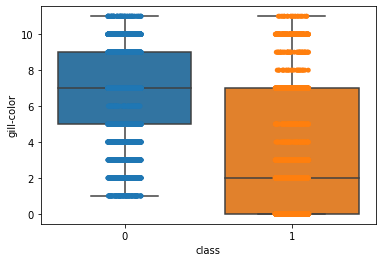

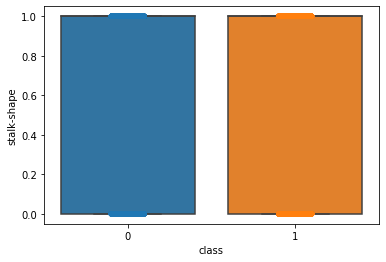

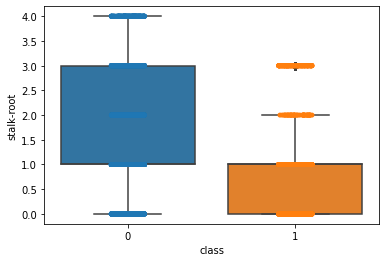

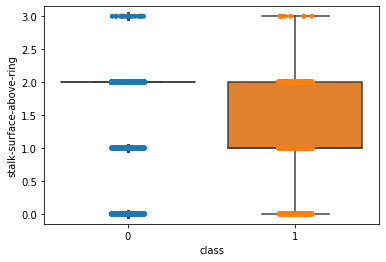

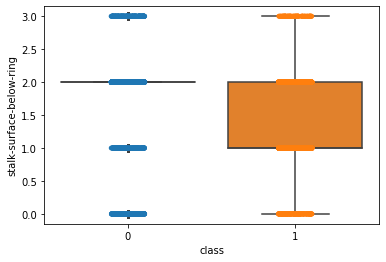

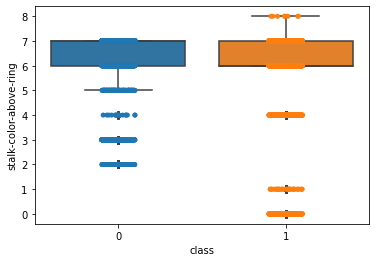

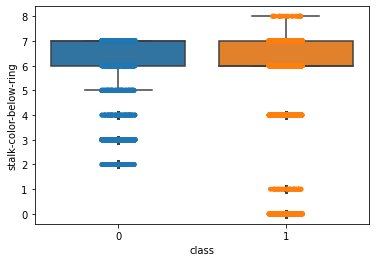

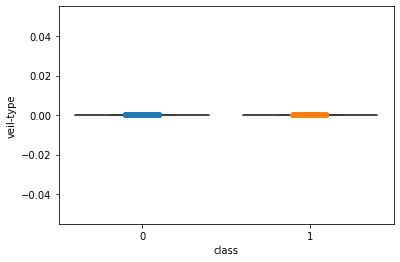

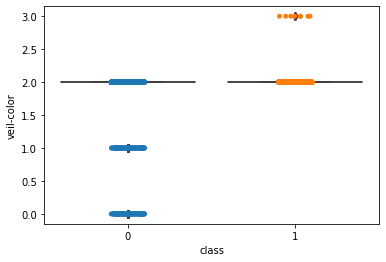

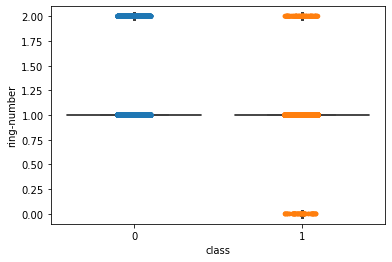

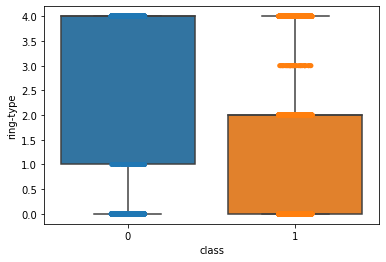

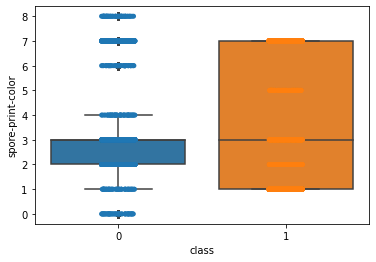

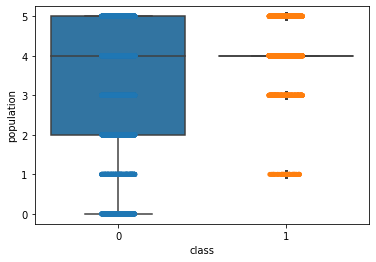

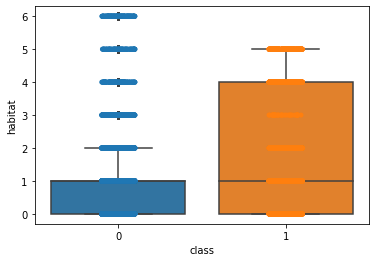

In [ ]:
#Making a boxplot
for col in df.columns:
  ax = sns.boxplot(x = 'class',y =col, data = df)
  ax = sns.stripplot(x = 'class',y =col, data = df, jitter =True, edgecolor = 'gray')
  plt.show()


## Separating features from target

In [ ]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

In [ ]:
print(x.head())

   cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0          5            2          4  ...                  2           3        5
1          5            2          9  ...                  3           2        1
2          0            2          8  ...                  3           2        3
3          5            3          8  ...                  2           3        5
4          5            2          3  ...                  3           0        1

[5 rows x 22 columns]


In [ ]:
x.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Correlation between variables

In [ ]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


## Data standarization

In [ ]:
#Importing the library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

## PRINCIPAL COMPONENT ANALYSIS (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.59211948e-17],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  4.35476041e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  1.93182410e-17],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  7.01453987e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -3.98483680e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  7.43806407e-20]])

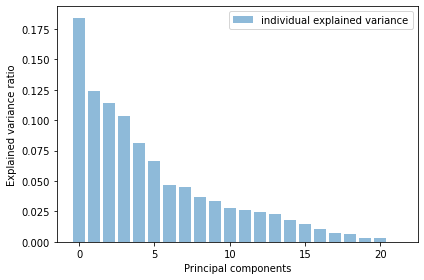

In [ ]:
#The explained variance ratio explains how much each feature influences the explanation of the variance of the model.
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
    
plt.bar(range(22), explained_variance_ratio, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
print(explained_variance_ratio)

[1.84458684e-01 1.23955899e-01 1.14306801e-01 1.03165737e-01
 8.10867705e-02 6.64182876e-02 4.66039611e-02 4.53247460e-02
 3.66638866e-02 3.38886068e-02 2.74993066e-02 2.58294323e-02
 2.42651684e-02 2.27216831e-02 1.83057085e-02 1.48185678e-02
 1.04106068e-02 7.59501185e-03 6.26216657e-03 3.48525415e-03
 2.93371356e-03 3.76432098e-35]


In [ ]:
#We look at the cumulative sum of principal components to see if we filter out any
np.cumsum(explained_variance_ratio)

array([0.18445868, 0.30841458, 0.42272138, 0.52588712, 0.60697389,
       0.67339218, 0.71999614, 0.76532089, 0.80198477, 0.83587338,
       0.86337269, 0.88920212, 0.91346729, 0.93618897, 0.95449468,
       0.96931325, 0.97972385, 0.98731887, 0.99358103, 0.99706629,
       1.        , 1.        ])

In [ ]:
# create the list of components to pass to the model 
lista_componentes = ["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16","pc17","pc18","pc19","pc20","pc21","pc22"]

In [ ]:
#the dataframe is created with the main components
df_pca = pd.DataFrame(pca.fit_transform(X),columns =lista_componentes)

In [ ]:
#If we want to optimize the model, some components can be filtered here (for example, those that add up to 80% of the variance)
df_pca_80 = df_pca[[]]

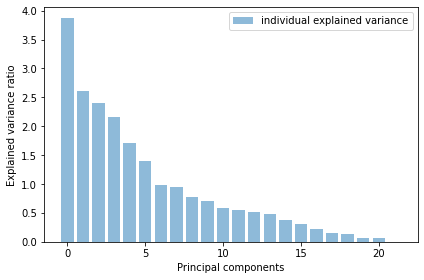

In [ ]:
#The explained variance ratio explains how much each feature influences the explanation of the variance of the model.
explained_variance = pca.explained_variance_

plt.figure(figsize=(6, 4))
    
plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Hay unos 4 features que tienen muy poca varianza

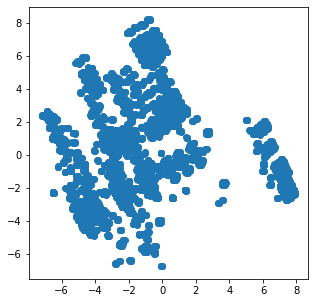

In [ ]:
#KNNMeans with the two principal components
N = df.values
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(N)
plt.figure(figsize =(5,5))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.show()


In [ ]:
# We can color them
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2,random_state = 4)
x_clustered = kmeans.fit_predict(N)
LABEL_COLOR_MAP = {0:'g',1:'r'}
label_color = [LABEL_COLOR_MAP[l]for l in x_clustered]
plt.figure (figsize = (5,5))
plt.scatter(x_clustered[:,0],x_clustered[:,1],c = label_color)

IndexError: ignored

<Figure size 360x360 with 0 Axes>

## PCA WITH 17 FEATURES

In [ ]:
pca_modificada = PCA(n_components = 17)
x_pca_trans = pca_modificada.fit_transform(X)
plt.figure(figsize =(5,5))
plt.scatter(x_pca_trans[:,0],x_pca_trans[:,1])
plt.show()

# TRAIN_TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)


# Machine Learning Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [ ]:
model_LR.fit(x_train,y_train)

LogisticRegression()

### Evaluating the model

In [ ]:
#imprimimos matriz de confusion de la regresion
from sklearn.metrics import confusion_matrix
#predecimos 
y_predic = model_LR.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,811,31
verdaderamente venenoso,29,754


#### ROC/AUC

In [ ]:
#Performance
auc_roc=metrics.roc_auc_score(y_test,y_predic)
print(auc_roc)

0.9630729304125978


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9630729304125978

Text(0.5, 0, 'False Positive Rate')

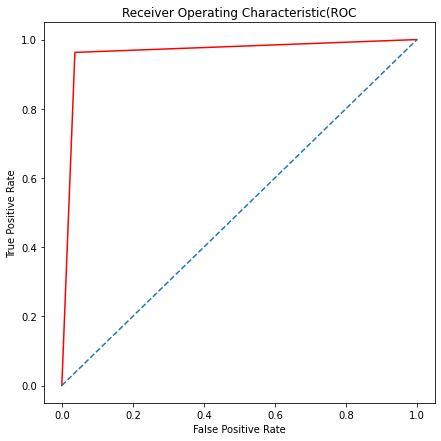

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

Logistica: f1=0.962 auc=0.971


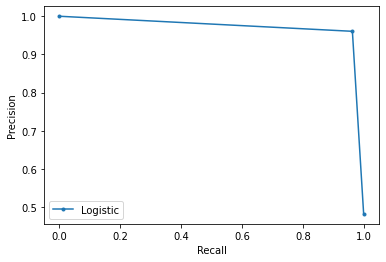

In [ ]:
#Libraries
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#Metrics
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# Adding scores and printing
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# Plotting the PRC
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Logistic Regression with hyperparameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model = LogisticRegression()

In [ ]:
parametros = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']}

In [ ]:
from sklearn.model_selection import GridSearchCV

LR = GridSearchCV(LR_model,parametros, cv = 5)
LR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Mejor combinacion de parametros",LR.best_params_)

Mejor combinacion de parametros {'C': 100, 'penalty': 'l2'}


### Evaluating the model

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
#predicting
y_predic = LR.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,813,29
verdaderamente venenoso,16,767


It is seen that by making hyperparameters we improve the normal predictors by 2 and the venous predictors by 13, a lot

#### ROC/AUC

In [ ]:
#Performance
auc_roc=metrics.roc_auc_score(y_test,y_predic)
print(auc_roc)

0.9725619837217839


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9725619837217839

Text(0.5, 0, 'False Positive Rate')

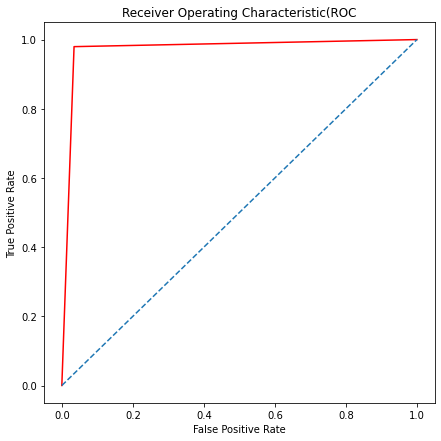

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

In [ ]:
#Libraries
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


In [ ]:
#Metrics
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# Adding scores and printing
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistica: f1=0.972 auc=0.976


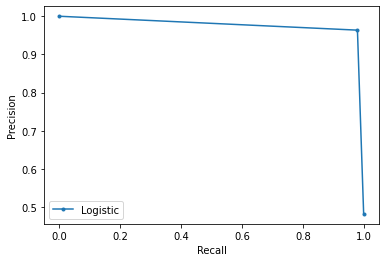

In [ ]:
# Plotting prc
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Desicion Tree

In [ ]:
#Importing the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)

In [ ]:
#Training
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
#predicting
y_predic = dt.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,842,0
verdaderamente venenoso,0,783


### Evaluating the model

#### ROC/AUC

## KNN Means

In [ ]:
#Library
from sklearn.cluster import  KMeans
knn_model =  KMeans(n_clusters = 2)

In [ ]:
#Training
knn_model.fit(x_train,y_train)

KMeans(n_clusters=2)

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
#predicting
y_predic = knn_model.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,836,6
verdaderamente venenoso,418,365


### Evaluating the model

#### ROC/AUC

In [ ]:
#AUC
from sklearn.metrics import roc_auc_score

auc_roc = metrics.roc_auc_score(y_predic,y_test)
print(auc_roc)

0.8252470799640612


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7295149601235276

Text(0.5, 0, 'False Positive Rate')

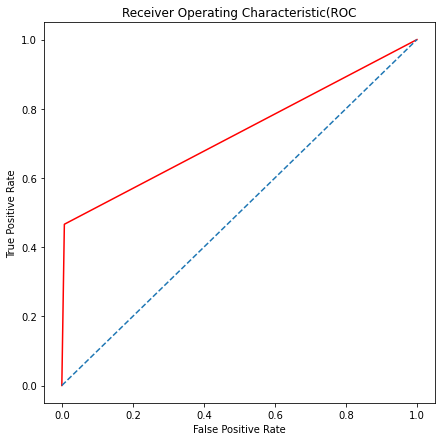

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

In [ ]:
#Libraries
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [ ]:
#metrics
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# adding the scores
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistica: f1=0.633 auc=0.854


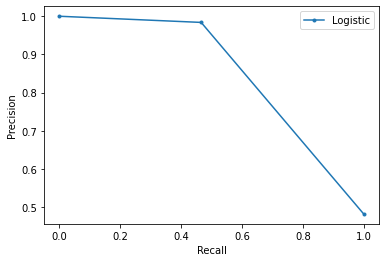

In [ ]:
# Plotting the PRC
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Random Forest

In [ ]:
#Importing the model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 3, criterion = 'gini', random_state = 45)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=45)

### Evaluating the model

In [ ]:
from sklearn.metrics import confusion_matrix
#predicting
y_predic= rf.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,842,0
verdaderamente venenoso,0,783


#### ROC/AUC

In [ ]:
#AUC
from sklearn.metrics import roc_auc_score

auc_roc = metrics.roc_auc_score(y_predic,y_test)
print(auc_roc)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

In [ ]:
#importing the libraries
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [ ]:
#metrics
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# sumamos los scores e imprimimos
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

In [ ]:
# Plotting the PRC
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#Feature Importance
feature_scores = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_scores)

odor                        0.252228
gill-size                   0.124467
gill-color                  0.124120
population                  0.109461
ring-type                   0.098462
bruises                     0.083338
stalk-root                  0.056962
stalk-surface-below-ring    0.029791
stalk-shape                 0.027401
stalk-color-below-ring      0.019511
spore-print-color           0.016975
habitat                     0.011380
ring-number                 0.010903
stalk-surface-above-ring    0.010406
cap-color                   0.009796
cap-shape                   0.005114
gill-spacing                0.003946
stalk-color-above-ring      0.003211
veil-color                  0.002513
cap-surface                 0.000015
veil-type                   0.000000
gill-attachment             0.000000
dtype: float64


Feature importance

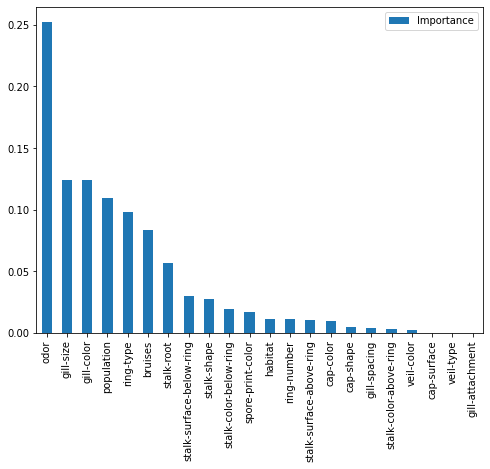

In [ ]:
feat_importances = pd.DataFrame(rf.feature_importances_, x.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Random Forest with hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
#imprimimos matriz de confusion de la clasificacion
from sklearn.metrics import confusion_matrix
#predecimos 
y_predic = rf_random.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,842,0
verdaderamente venenoso,0,783


### Evaluating the model

In [ ]:
best_random = rf_random.best_estimator_
print(best_random)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=400)


#### ROC/AUC

In [ ]:
#AUC
from sklearn.metrics import roc_auc_score

auc_roc = metrics.roc_auc_score(y_predic,y_test)
print(auc_roc)

1.0


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

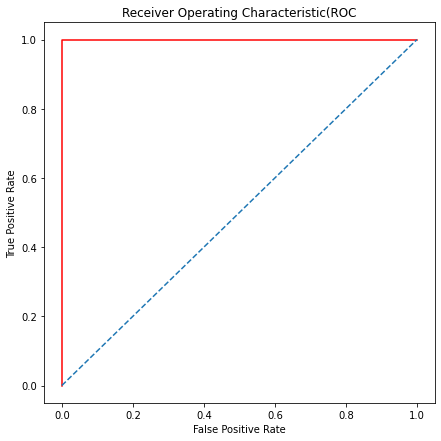

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

In [ ]:
#Libraries
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [ ]:
#Metrics
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# Adding scores
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistica: f1=1.000 auc=1.000


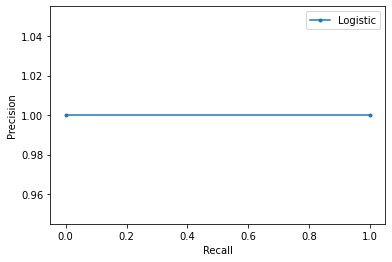

In [ ]:
# PRC
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
xg = xgb.XGBClassifier(n_estimators= 200,max_depth = 5, seed = 0, verbose = True, eval_metric = ['error', 'logloss'], eval_set = eval_set)
xg.fit(x_train, y_train)


XGBClassifier(eval_metric=['error', 'logloss'],
              eval_set=[(array([[ 1.02971224,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224, -1.48615695, -0.59107461, ..., -0.2504706 ,
         1.08304882, -0.8771691 ],
       [-2.08704716,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       ...,
       [-0.8403434 ,  0.14012794, -0.98389939, ...,  1.42842641,
         0.2843298...
       [ 1.02971224, -1.48615695, -0.59107461, ..., -1.08991911,
         0.28432981, -0.29572966],
       [-0.8403434 ,  0.14012794,  1.37304929, ..., -0.67019486,
        -2.91054623, -0.29572966],
       [ 1.02971224,  0.95327039,  1.76587407, ..., -1.08991911,
         0.28432981, -0.29572966]]),
                         7817    0
5829    1
1795    1
4967    1
6303    1
       ..
2801    0
2581    0
3109    1
612     0
3190    1
Name: class, Length: 1625, dtype: int64)],
              max_depth=5, n_estimators=200, see

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
#predicting
y_predic = xg.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,842,0
verdaderamente venenoso,0,783


### Evaluating the models

#### ROC/AUC

In [ ]:
#AUC
from sklearn.metrics import roc_auc_score

auc_roc = metrics.roc_auc_score(y_predic,y_test)
print(auc_roc)

1.0


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

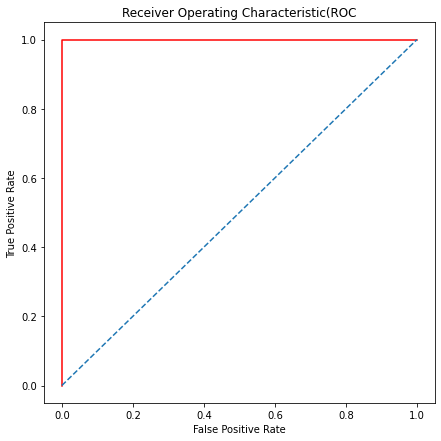

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

In [ ]:
#Libraries
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [ ]:
#metrics
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# Adding scores
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistica: f1=1.000 auc=1.000


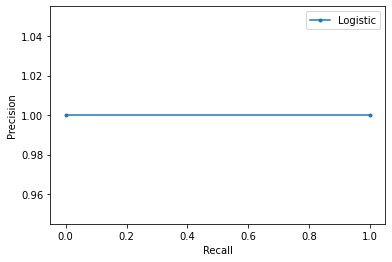

In [ ]:
# Plotting PRC
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Appendix

The most effective models were:
Random Forest
Random Forest with Hyperparameters
XGBOOST

For a matter of time in processing the data, the 2 best performances are:
Random Forest
XGBOOST